<img src="http://universidadcucii.mx/img/demos/law-firm/logo.png" width="150">

# Universidad CUCII 
## Estadística para la Educación

### Sesión 05/05 (Sábado 2018-06-30)

In [1]:
#R como una calculadora
fi <- (1 +  sqrt(5) )/2
fi

[1] 1.618034

Teniendo el archivo *Totales_modif.csv* en la ruta default que indica la orden:

In [2]:
getwd()

[1] "/home/ani/Dropbox/sonora/CUCII-StatsEdu"

In [3]:
d <- read.csv(file = "Totales_modif.csv")
head(d)

grupo,mat,nombrecompleto,sexo,promedio,demeritos,faltas
2.1,9737,ALVAREZ SÁNCHEZ KEVIN ALEXIS,M,8.5,0,7
2.1,9628,ARROYO RUBIO IÑAKI IAN,M,8.3,80,11
2.1,7801,GUZMÁN ESPINOZA IVAN,M,6.4,0,3
2.1,7529,HERNÁNDEZ GRANADOS YESENIA ESMERALDA,F,10.0,0,2
2.1,6137,LUNA BECERRA LILIANA,F,9.7,0,0
2.1,6079,MARTÍNEZ CASTELLANOS HAZEL,M,9.4,5,7


Revisemos los tipos de variables que sean correctos:

In [4]:
str(d)

'data.frame':	81 obs. of  7 variables:
 $ grupo         : num  2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 ...
 $ mat           : int  9737 9628 7801 7529 6137 6079 9957 12522 7387 9761 ...
 $ nombrecompleto: Factor w/ 81 levels "ALVAREZ SÁNCHEZ KEVIN ALEXIS",..: 1 3 30 31 37 40 41 43 46 48 ...
 $ sexo          : Factor w/ 2 levels "F","M": 2 2 2 1 1 2 2 2 2 2 ...
 $ promedio      : num  8.5 8.3 6.4 10 9.7 9.4 8.5 10 7.2 8.4 ...
 $ demeritos     : int  0 80 0 0 0 5 0 90 0 55 ...
 $ faltas        : int  7 11 3 2 0 7 3 3 6 4 ...


tenemos que:
- grupo debería ser Factor
- nombrecompleto debería ser Charater

In [5]:
d$grupo <- as.factor(d$grupo)
d$nombrecompleto <- as.character(d$nombrecompleto)
str(d)

'data.frame':	81 obs. of  7 variables:
 $ grupo         : Factor w/ 4 levels "2.1","2.2","2.3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mat           : int  9737 9628 7801 7529 6137 6079 9957 12522 7387 9761 ...
 $ nombrecompleto: chr  "ALVAREZ SÁNCHEZ KEVIN ALEXIS" "ARROYO RUBIO IÑAKI IAN" "GUZMÁN ESPINOZA IVAN" "HERNÁNDEZ GRANADOS YESENIA ESMERALDA" ...
 $ sexo          : Factor w/ 2 levels "F","M": 2 2 2 1 1 2 2 2 2 2 ...
 $ promedio      : num  8.5 8.3 6.4 10 9.7 9.4 8.5 10 7.2 8.4 ...
 $ demeritos     : int  0 80 0 0 0 5 0 90 0 55 ...
 $ faltas        : int  7 11 3 2 0 7 3 3 6 4 ...


#### 1. Promedio por grupos
Utilizamos la función *boxplot* con la nomenclatura variable1 *explicadapor* variable2, mediante el símbolo: $\sim$ (para las víctimas del windows, que si está bien configurado tu teclado latinoamericano apretando altgr y la tecla '+', debería escribirlo; de lo contrario la secuencia alt+126 también funciona)  

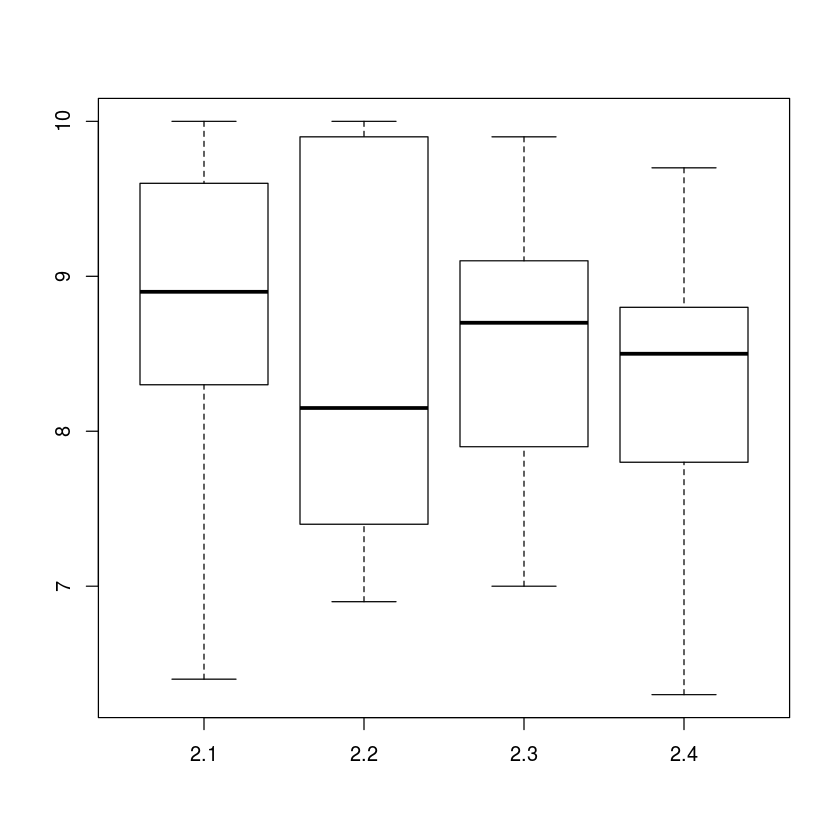

In [8]:
boxplot(d$promedio ~ d$grupo) #ésto se lee promedio explicado por grupo

#### 2. Deméritos por grupos

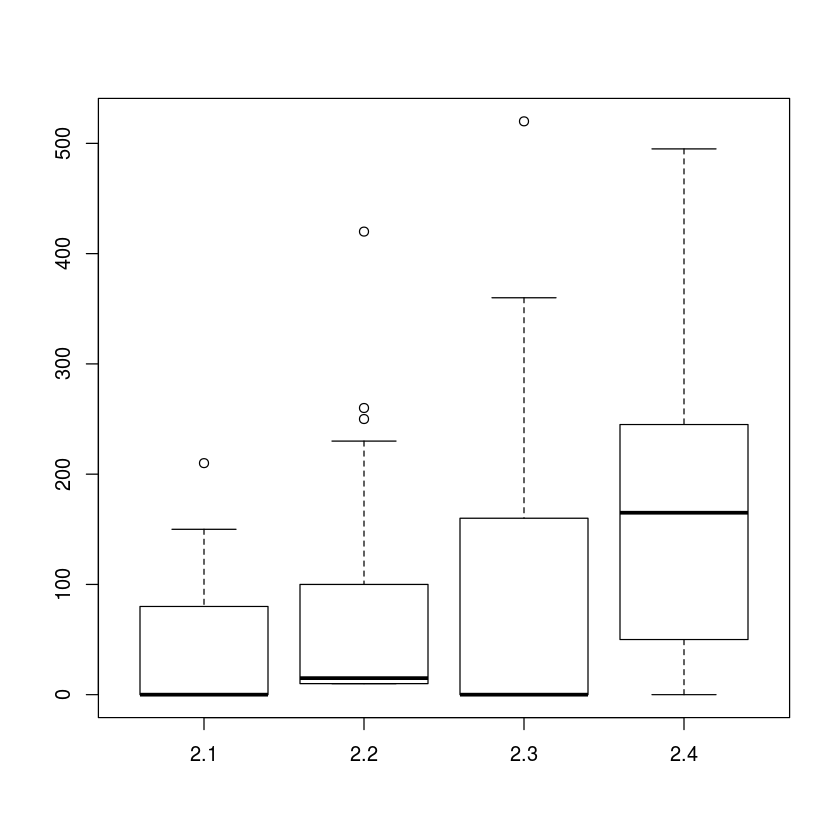

In [9]:
boxplot(d$demeritos ~ d$grupo)

La importancia de no etiquetar tan a la ligera los grupos en las escuelas debido al [Efecto Pigmalión](https://es.wikipedia.org/wiki/Efecto_Pigmalión), conviene a veces nombrarlos con etiquetas que no presupongan un órden, sino cualidades complementarias entre sí ("Compromiso", "Responsabilidad", etc.) o totalmente neutras ("Bach", "Mozart", etc.)

#### 3. Calificaciones por sexo

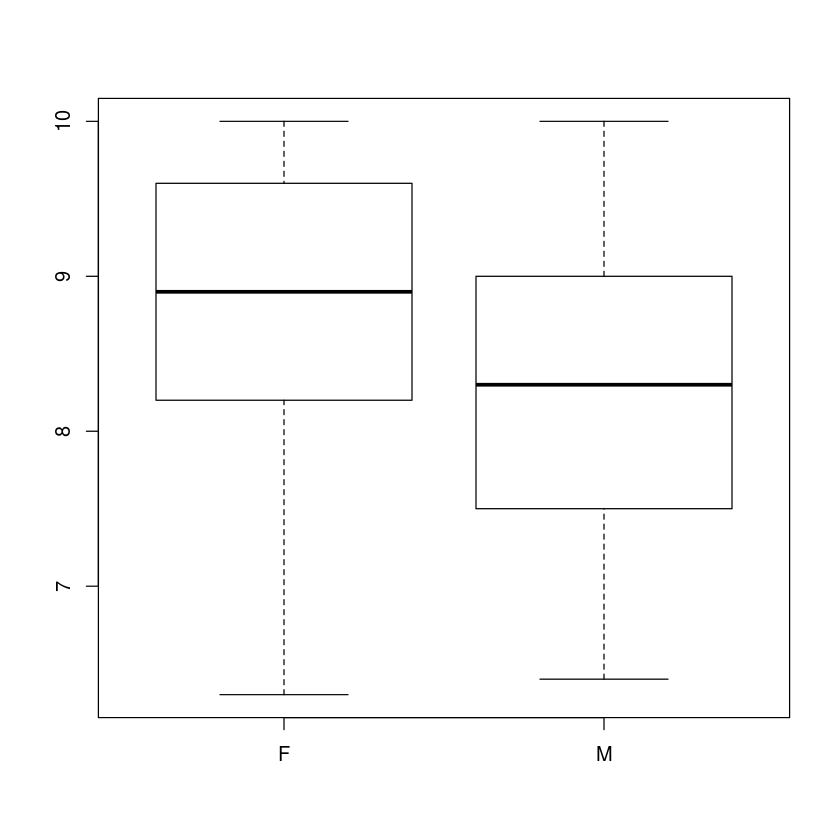

In [10]:
boxplot(d$promedio ~ d$sexo)

#### 4. Resúmenes por grupo
Recordemos que la manera de hacer subconjuntos de un data.frame es mediante la sintaxis:
$$dataframe [ renglones, columnas ]$$
si la condición estará en los renglones, por ejemplo, y se quieren todas las columnas:
$$dataframe [ dataframe$variable <= limite,  ]$$
la coma y el espacio en blanco antes del corchete le indican a R que se quieren todas las columnas en el resultado.


In [11]:
#¿cuántos grupos hay?
levels(d$grupo)

[1] "2.1" "2.2" "2.3" "2.4"

In [13]:
g3 <- d[d$grupo=="2.3",] 
head(g3)

,grupo,mat,nombrecompleto,sexo,promedio,demeritos,faltas
44,2.3,9618,AVILÉS RIOS JESSICA,F,9.1,0,9
45,2.3,8575,AYMERICH VELAZQUEZ JESSICA YAHAIRA,F,9.9,0,4
46,2.3,7720,CALLAHAN RUIZ SEBASTIAN,M,7.5,80,15
47,2.3,9649,CAMPERO HERNÁNDEZ JIMENA AMERICA,F,7.9,0,16
48,2.3,9640,CUEVAS VIVANCO GAEL ARTURO,M,8.5,0,9
49,2.3,7647,ESTRADA PEREO IAN,M,7.0,0,13


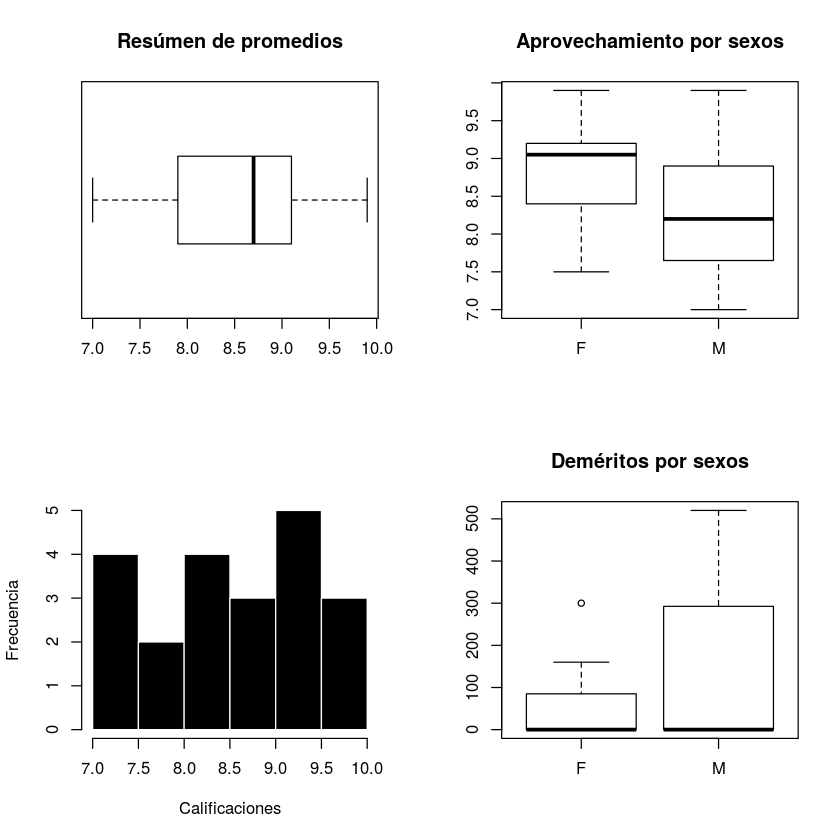

In [31]:
layout(matrix(1:4,2,2,byrow = T))
boxplot(g3$promedio,horizontal = T, main="Resúmen de promedios")
boxplot(g3$promedio ~ g3$sexo,main="Aprovechamiento por sexos")
hist(g3$promedio,xlab = "Calificaciones",ylab = "Frecuencia",main="",col="black",border = F)
boxplot(g3$demeritos ~ g3$sexo, main="Deméritos por sexos")

¿Cómo escoger a los alumnos cuyo promedio esté en el cuartil superior?

In [33]:
summary(g3$promedio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00    7.90    8.70    8.59    9.10    9.90 

In [37]:
g3[g3$promedio>=9.10,]

,grupo,mat,nombrecompleto,sexo,promedio,demeritos,faltas
44,2.3,9618,AVILÉS RIOS JESSICA,F,9.1,0,9
45,2.3,8575,AYMERICH VELAZQUEZ JESSICA YAHAIRA,F,9.9,0,4
52,2.3,NA,HERNÁNDEZ REYNA ELIANE ANDREA,F,9.2,85,9
58,2.3,9672,RAMOS TELLEZ DIEGO EMILIO,M,9.9,0,1
60,2.3,7545,RÍOS LÓPEZ ROMINA,F,9.1,0,6
62,2.3,8368,SERRANO VILLAGRANA SELENE LIZETTE,F,9.8,160,1
63,2.3,8105,TORRES MORALES JORGE ISRAEL,M,9.3,0,4
64,2.3,8334,VIVEROS RODRÍGUEZ JONATAN DANIEL,M,9.1,0,3


Otra manera directa es mediante la función *quantile*

In [43]:
g3[ g3$promedio >= quantile(g3$promedio)[[4]],]

,grupo,mat,nombrecompleto,sexo,promedio,demeritos,faltas
44,2.3,9618,AVILÉS RIOS JESSICA,F,9.1,0,9
45,2.3,8575,AYMERICH VELAZQUEZ JESSICA YAHAIRA,F,9.9,0,4
52,2.3,NA,HERNÁNDEZ REYNA ELIANE ANDREA,F,9.2,85,9
58,2.3,9672,RAMOS TELLEZ DIEGO EMILIO,M,9.9,0,1
60,2.3,7545,RÍOS LÓPEZ ROMINA,F,9.1,0,6
62,2.3,8368,SERRANO VILLAGRANA SELENE LIZETTE,F,9.8,160,1
63,2.3,8105,TORRES MORALES JORGE ISRAEL,M,9.3,0,4
64,2.3,8334,VIVEROS RODRÍGUEZ JONATAN DANIEL,M,9.1,0,3
